<a href="https://colab.research.google.com/github/Sanderson28801/ML2022/blob/main/Midterm_But_Pretty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to our project!

By Arjun, Spencer, and Yuriy

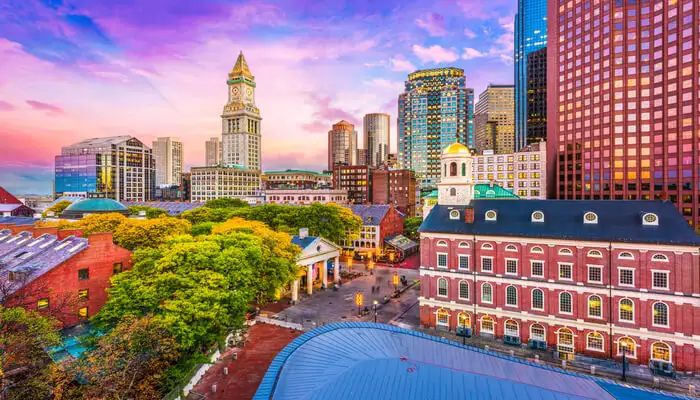

(Boston because of Northeastern)


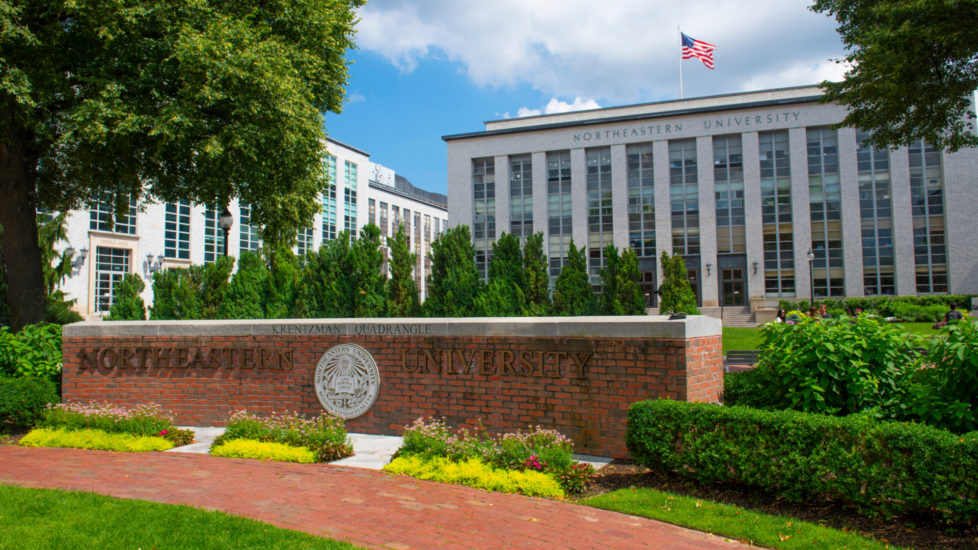# Accessing texts and preprocessing



Mounting Colab to Google Drive for easy access to documents

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating lists for Female and Male texts

In [ ]:
Male_Texts = ["https://www.gutenberg.org/cache/epub/5500/pg5500.txt", "https://www.gutenberg.org/cache/epub/22914/pg22914.txt", "https://www.gutenberg.org/cache/epub/67065/pg67065.txt",
        "https://www.gutenberg.org/files/15491/15491-0.txt","https://www.gutenberg.org/cache/epub/25830/pg25830.txt","https://www.gutenberg.org/files/64097/64097-0.txt"]
#All of the links to Gutenberg for easy retrival

Female_Texts =["/content/drive/MyDrive/midterm-project-files/cavendish.natpix.txt","/content/drive/MyDrive/midterm-project-files/cavendish.observations (2).txt","/content/drive/MyDrive/midterm-project-files/cavendish.philosophical.txt",
         "/content/drive/MyDrive/midterm-project-files/conway.philosophy.txt","/content/drive/MyDrive/midterm-project-files/stone.midwifery.txt","/content/drive/MyDrive/midterm-project-files/wolley.cook.txt"]
#All of the links to the Dropbox for easy access


Very primitive preprocessing for male texts due to the method of obtaining results

In [ ]:
#Needed Libraries
from urllib import request #For getting Gutenberg texts from link
import nltk
from nltk import word_tokenize #Makes preprocessing easier
nltk.download("punkt")

In [ ]:
Male_Data = []
for num, i  in enumerate(Male_Texts):
  response = request.urlopen(i)
  raw = response.read().decode('utf8')
  start = raw.find("*** START OF TH")
  end = raw.rfind("*** END OF TH")
  raw = raw[start:end]
  data = raw.lower()
  raw_tokenized = word_tokenize(data)
  split_raw = []
  data = []
  for word in raw_tokenized:
    split_raw.append(word)
  for i in range(1000):
    y = split_raw[i * 800: (i + 1) * 800]
    if y == []:
      break
    Male_Data.append(y)
  

In [ ]:
#Male_Data

Female preprocessing

In [ ]:
Female_Data = []
for i in Female_Texts:
  file = open(i, "r")
  text = file.read()
  data = text.lower()
  raw_tokenized = word_tokenize(data)
  split_raw = []
  data = []
  for word in raw_tokenized:
    split_raw.append(word)
  for i in range(1000):
    y = split_raw[i * 800: (i + 1) * 800]
    if y == []:
      break
    Female_Data.append(y)
 

In [ ]:
#Female_Data

Test Preprocessing

In [ ]:
test = open("/content/drive/MyDrive/midterm-project-files/grey.secretphysick.txt", "r")
text = test.read()
raw = text.lower()
raw_tokenized = word_tokenize(raw)
split_raw = []
test_data = []
for word in raw_tokenized:
  split_raw.append(word)
for i in range(1000):
  y = split_raw[i * 800: (i + 1) * 800]
  if y == []:
    break
  test_data.append(y)
test = test_data

In [ ]:
#test

#Playing Around With Pos Tags

In [ ]:
#list of Pos Tags
pos = [("CC", "coordinating conjunction"),
("CD",  "cardinal digit"),
("DT",  "determiner"),
("EX",  "existential"),
("FW",  "foreign word"),
("IN",  "preposition/subordinating conjunction"),
("JJ",  "adjective 'big'"),
("JJR",  "adjective, comparative 'bigger'"),
("JJS",  "adjective, superlative 'biggest'"),
("LS",  "list marker 1"),
("MD",  "modal could, will"),
("NN",  "noun, singular 'desk'"),
("NNS",  "noun plural 'desks'"),
("NNP",  "proper noun, singular 'Harrison'"),
("NNPS",  "proper noun, plural 'Americans'"),
("PDT",  "predeterminer 'all the kids'"),
("POS", " possessive ending parent's"),
("PRP", " personal pronoun I, he, she"),
("PRP$", " possessive pronoun my, his, hers"),
("RB", " adverb very, silently,"),
("RBR", " adverb, comparative better"),
("RBS", " adverb, superlative best"),
("RP", " particle give up"),
("TO", " to go 'to' the store."),
("UH", " interjection errrrrrrrm"),
("VB", " verb, base form take"),
("VBD", " verb, past tense took"),
("VBG", " verb, gerund/present participle taking"),
("VBN", " verb, past participle taken"),
("VBP", " verb, sing. present, non-3d take"),
("VBZ", " verb, 3rd person sing. present takes"),
("WDT", "wh-determiner which"),
("WP", "wh-pronoun who, what"),
("WP$", "possessive wh-pronoun whose"),
("WRB","wh-abverb where, when")]

Function for getting amounts of parts of speech

In [ ]:
pos = pos[6:9] + pos[13:22]
pos

[('JJ', "adjective 'big'"),
 ('JJR', "adjective, comparative 'bigger'"),
 ('JJS', "adjective, superlative 'biggest'"),
 ('NNP', "proper noun, singular 'Harrison'"),
 ('NNPS', "proper noun, plural 'Americans'"),
 ('PDT', "predeterminer 'all the kids'"),
 ('POS', " possessive ending parent's"),
 ('PRP', ' personal pronoun I, he, she'),
 ('PRP$', ' possessive pronoun my, his, hers'),
 ('RB', ' adverb very, silently,'),
 ('RBR', ' adverb, comparative better'),
 ('RBS', ' adverb, superlative best')]

In [ ]:
nltk.download("averaged_perceptron_tagger")
def amount(data):
  tagged = []
  
  tagged += nltk.pos_tag(data)
  amount = []
  for i in pos:
    x = 0
    for words in tagged:
      if words[1] == i[0]:
        x += 1

    amount.append(x)
  return amount


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Using Function to get Training Data

In [ ]:
corpus = []
for i in range(450):
  corpus.append(amount(Male_Data[i]))
for i in range(450):
  corpus.append(amount(Female_Data[i]))
for i in test:
  corpus.append(amount(i))

In [ ]:
import numpy as np
X = corpus

test = X[900:]
train = np.delete(X, slice(900, 100000), 0)

Setting up for model with Test,Train, Split

In [ ]:
from sklearn.model_selection import train_test_split #splits data into appropriate proportions for SVM


labels = []
for i in range(450):
  labels.append(1)
for i in range(450):
  labels.append(0)
y = labels
X = train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)


Creating Model

In [ ]:
from sklearn import svm #Gives us an SVM model
m = svm.SVC(kernel = "linear", C = 10)

Fitting Model to Training and Validation Data

In [ ]:
m.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [ ]:
m.coef_

array([[-6.80009870e-02,  1.93195732e-01, -5.50698271e-02,
         2.06199787e+00,  0.00000000e+00,  2.62578094e-01,
        -2.71394021e+00, -6.63510402e-02, -5.11283002e-02,
         1.61589555e-03,  1.35796590e-01,  4.40272593e-01]])

Checking Accuracy of Model

In [ ]:
from sklearn.metrics import accuracy_score #For getting accuracy easily
Y_pred = m.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print(accuracy)

0.9666666666666667


In [ ]:
Y_pred = m.predict(test)
print(Y_pred)
x = 0
y = 0
for i in Y_pred:
  if i == 1:
    x +=1
  else:
    y += 1
if x >=y:
  print(x)
  print(1)
elif y > x:
   print("There were " + str(y) + " zeros.")
   print(0)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1]
There were 43 zeros.
0
